# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
from pprint import pprint
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
cities_dict = {
    "city": cities
}
city_list = pd.DataFrame(cities_dict)
city_list

,city
0,paldiski
1,river falls
2,ushuaia
3,luan
4,vila velha
...,...
618,nemuro
619,sakaiminato
620,scarborough
621,tamala


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.

weather = []

print("Beginning Data Retrieval")
print("---------------------------")

rec = 0
sets = 1

for city in cities:
    rec += 1
    print(f"Processing Record {rec} of Set {sets} | {city}")
    
    if rec == 50:
        sets += 1
        rec = 0
        
    try:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(url).json()
        weather.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Long": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Wind": response["wind"]["speed"],
            "Cloudiness": response["clouds"]["all"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass                        

print('-----------------------------\nData Retrieval Complete\n-----------------------------')


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | paldiski
Processing Record 2 of Set 1 | river falls
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | luan
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | guozhen
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | mende
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | saint-medard-en-jalles
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | olinda
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | attawapiska

Processing Record 37 of Set 4 | tambopata
Processing Record 38 of Set 4 | hatton
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 42 of Set 4 | benguela
Processing Record 43 of Set 4 | praia
Processing Record 44 of Set 4 | nizhneudinsk
Processing Record 45 of Set 4 | kiruna
Processing Record 46 of Set 4 | linxia
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | rafaela
Processing Record 50 of Set 4 | hermanus
Processing Record 1 of Set 5 | thap than
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | dawlatabad
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | batagay-alyta
Processing Record 8 of Set 5 | cherskiy
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set

Processing Record 28 of Set 8 | kalomo
City not found. Skipping...
Processing Record 29 of Set 8 | dauriya
Processing Record 30 of Set 8 | celestun
Processing Record 31 of Set 8 | shaowu
Processing Record 32 of Set 8 | areosa
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | nevsehir
Processing Record 35 of Set 8 | krasnoarmeysk
Processing Record 36 of Set 8 | turtas
Processing Record 37 of Set 8 | tara
Processing Record 38 of Set 8 | nueve de julio
Processing Record 39 of Set 8 | gao
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | mareeba
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | mendi
Processing Record 45 of Set 8 | la maddalena
Processing Record 46 of Set 8 | kloulklubed
Processing Record 47 of Set 8 | wamba
Processing Record 48 of Set 8 | zaysan
Processing Record 49 of Set 8 | geraldton
Processing Record 50 of Set 8 | w

Processing Record 16 of Set 12 | denizli
Processing Record 17 of Set 12 | idrinskoye
Processing Record 18 of Set 12 | avera
Processing Record 19 of Set 12 | dzhebariki-khaya
Processing Record 20 of Set 12 | montrose
Processing Record 21 of Set 12 | balkanabat
Processing Record 22 of Set 12 | yining
Processing Record 23 of Set 12 | hanumangarh
Processing Record 24 of Set 12 | sandnessjoen
Processing Record 25 of Set 12 | amapa
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | bosaso
Processing Record 28 of Set 12 | ichinohe
Processing Record 29 of Set 12 | brae
Processing Record 30 of Set 12 | assiniboia
Processing Record 31 of Set 12 | burica
City not found. Skipping...
Processing Record 32 of Set 12 | atsiki
City not found. Skipping...
Processing Record 33 of Set 12 | ngaoundere
Processing Record 34 of Set 12 | bull savanna
Processing Record 35 of Set 12 | turukhansk
Processing Record 36 of Set 12 | vao
Processing Record 37 of Set 12 | pokotylivka
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
city_df = pd.DataFrame(weather)
city_df.head()

,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,paldiski,59.3567,24.0531,28.99,100,8.05,75,EE,1611001585
1,river falls,44.8614,-92.6238,23.00,63,5.75,90,US,1611001586
2,ushuaia,-54.8000,-68.3000,51.80,66,14.97,75,AR,1611001167
3,luan,46.3592,6.9759,33.01,80,4.61,0,CH,1611001586
4,vila velha,-20.3297,-40.2925,84.20,61,13.80,0,BR,1611001027


In [6]:
# Export Dataframe into a .csv
city_df.to_csv("cities.csv", index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# hum_del = city_df.loc[(city_df["Humidity"])>100]
# print(hum_del)
hum_del_df=city_df.describe()
hum_del_df

,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.708199,17.046207,46.970175,73.127622,8.277150,54.045455,1.611001e+09
std,33.792377,90.126224,33.499840,20.274201,6.002704,40.947209,2.255498e+02
min,-54.800000,-179.166700,-52.060000,10.000000,0.110000,0.000000,1.611001e+09
25%,-6.610300,-60.330125,26.452500,64.000000,3.492500,3.750000,1.611001e+09
50%,28.484300,21.851500,55.400000,78.000000,6.910000,72.000000,1.611002e+09
75%,49.851225,93.337500,75.200000,88.000000,11.500000,96.000000,1.611002e+09
max,78.218600,178.416700,96.710000,100.000000,33.260000,100.000000,1.611002e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.
print("How unfortunate. There are no cities with humidity over 100%")

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data_df = city_df.copy(deep=True)
clean_city_data_df

quartiles = clean_city_data_df["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

hum_clean_df = clean_city_data_df.loc[(clean_city_data_df["Humidity"] < lower_bound) | (clean_city_data_df["Humidity"] > upper_bound)]
hum_clean_df.head()



The lower quartile of occupancy is: 64.0
The upper quartile of occupancy is: 88.0
The interquartile range of occupancy is: 24.0
The the median of occupancy is: 78.0 
Values below 28.0 could be outliers.
Values above 124.0 could be outliers.


,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
92,bara,10.3744,10.7288,77.83,19,13.09,1,NG,1611001237
96,half moon bay,37.4636,-122.4286,73.40,16,16.11,1,US,1611001049
115,tessalit,20.1986,1.0114,68.16,21,8.93,22,ML,1611001611
128,saint george,37.1041,-113.5841,57.99,19,4.61,1,US,1611000883
145,laguna,38.4210,-121.4238,71.60,15,23.02,1,US,1611001619


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

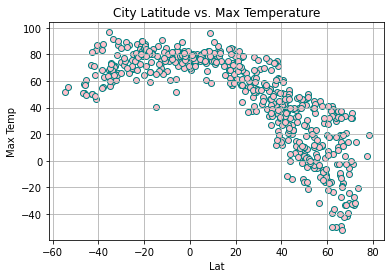

In [9]:
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

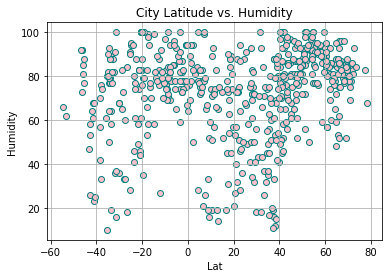

In [19]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal" )
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

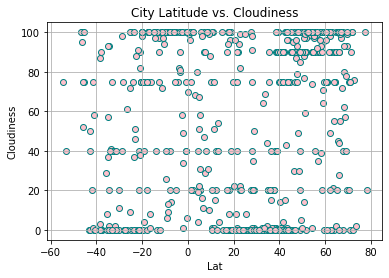

In [20]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

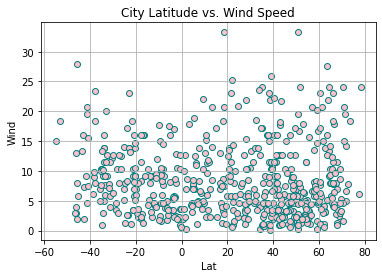

In [21]:
x_values = city_df["Lat"]
y_values = city_df["Wind"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Lat")
plt.ylabel("Wind")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [14]:
# Need to define Northern Hemisphere and Southern Hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

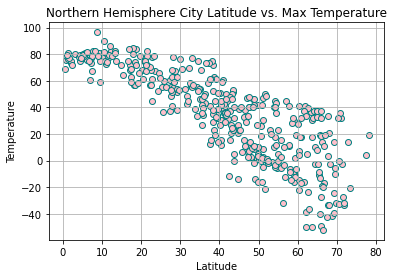

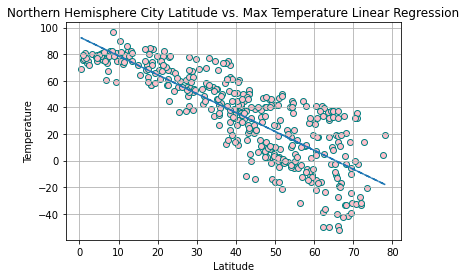

In [50]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_temp = north["Max Temp"]
s_temp = south["Max Temp"]
# print(north)

x_values = n_lat
y_values = n_temp
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
temp_slope, temp_int, temp_r, temp_p, temp_std_err = st.linregress(n_lat, n_temp)
temp_eq = temp_slope * n_temp + temp_int
# print(temp_eq)

# Create equation of line to calculate predicted violent crime rate
temp_eq = temp_slope * n_lat + temp_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_temp
plt.scatter(n_lat,n_temp, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,temp_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature Linear Regression")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

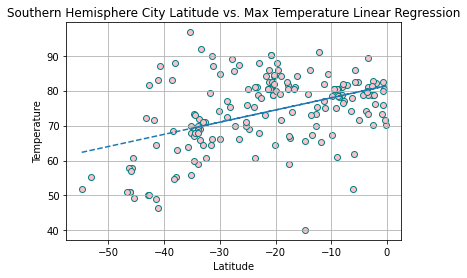

In [51]:
# Perform a linear regression on year versus violent crime rate
temp_slope, temp_int, temp_r, temp_p, temp_std_err = st.linregress(s_lat, s_temp)
temp_eq = temp_slope * s_temp + temp_int
# print(temp_eq)

# Create equation of line to calculate predicted violent crime rate
temp_eq = temp_slope * s_lat + temp_int

x_values = s_lat
y_values = s_temp
plt.scatter(s_lat,s_temp, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,temp_eq,"--")
# plt.xticks(s_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature Linear Regression")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

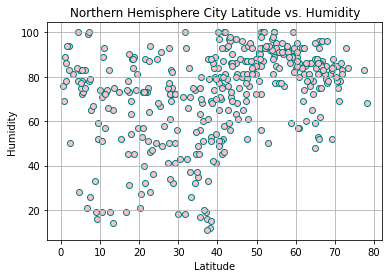

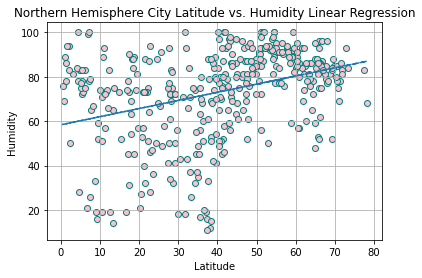

In [52]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_hum = north["Humidity"]
s_hum = south["Humidity"]


x_values = n_lat
y_values = n_hum
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
hum_slope, hum_int, hum_r, hum_p, hum_std_err = st.linregress(n_lat, n_hum)
hum_eq = hum_slope * n_hum + hum_int
# print(hum_eq)

# Create equation of line to calculate predicted violent crime rate
hum_eq = hum_slope * n_lat + hum_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_hum
plt.scatter(n_lat,n_hum, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,hum_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Humidity Linear Regression")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

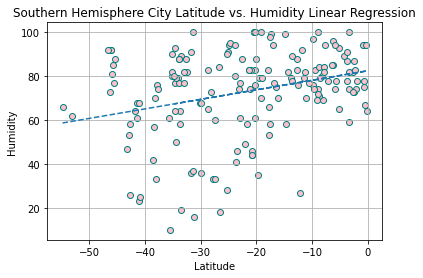

In [54]:
# Perform a linear regression on year versus violent crime rate
hum_slope, hum_int, hum_r, hum_p, hum_std_err = st.linregress(s_lat, s_hum)
hum_eq = hum_slope * s_hum + hum_int
# print(hum_eq)

# Create equation of line to calculate predicted violent crime rate
hum_eq = hum_slope * s_lat + hum_int

# Plot the linear model on top of scatter plot 
x_values = s_lat
y_values = s_hum
plt.scatter(s_lat,s_hum, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,hum_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs. Humidity Linear Regression")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

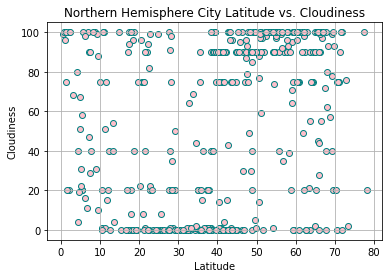

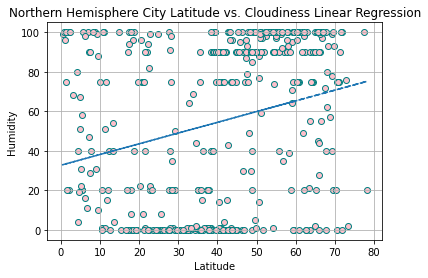

In [55]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_cloud = north["Cloudiness"]
s_cloud = south["Cloudiness"]


x_values = n_lat
y_values = n_cloud
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
cloud_slope, cloud_int, cloud_r, cloud_p, cloud_std_err = st.linregress(n_lat, n_cloud)
cloud_eq = cloud_slope * n_cloud + cloud_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
cloud_eq = cloud_slope * n_lat + cloud_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_cloud
plt.scatter(n_lat,n_cloud, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,cloud_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness Linear Regression")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

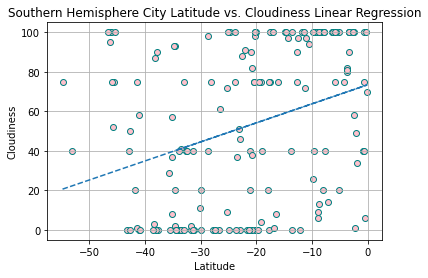

In [56]:
# Perform a linear regression on year versus violent crime rate
cloud_slope, cloud_int, cloud_r, cloud_p, cloud_std_err = st.linregress(s_lat, s_cloud)
cloud_eq = cloud_slope * s_cloud + cloud_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
cloud_eq = cloud_slope * s_lat + cloud_int

# Plot the linear model on top of scatter plot 
x_values = s_lat
y_values = s_cloud
plt.scatter(s_lat,s_cloud, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,cloud_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness Linear Regression")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

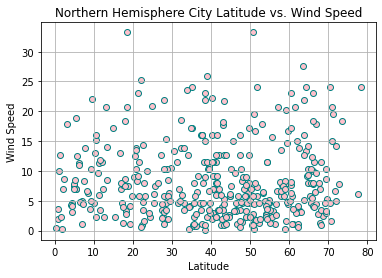

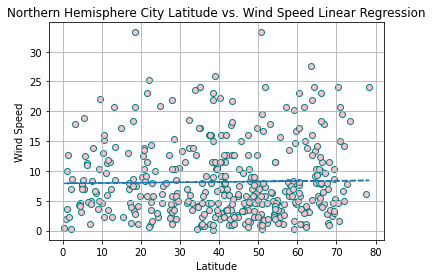

In [58]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_wind = north["Wind"]
s_wind = south["Wind"]


x_values = n_lat
y_values = n_wind
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
wind_slope, wind_int, wind_r, wind_p, wind_std_err = st.linregress(n_lat, n_wind)
wind_eq = wind_slope * n_wind + wind_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
wind_eq = wind_slope * n_lat + wind_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_wind
plt.scatter(n_lat,n_wind, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,wind_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed Linear Regression")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

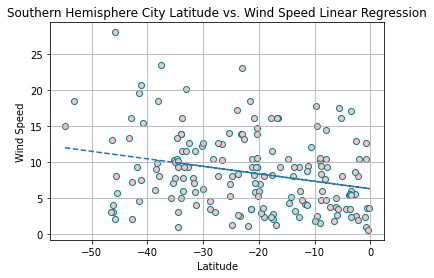

In [59]:
# Perform a linear regression on year versus violent crime rate
wind_slope, wind_int, wind_r, wind_p, wind_std_err = st.linregress(s_lat, s_wind)
wind_eq = wind_slope * s_wind + wind_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
wind_eq = wind_slope * s_lat + wind_int

# Plot the linear model on top of scatter plot 
x_values = s_lat
y_values = s_wind
plt.scatter(s_lat,s_wind, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,wind_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed Linear Regression")
plt.grid()
plt.show()